## **08-04 케라스의 SimpleRNN과 LSTM 이해하기**

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 RNN과 LSTM 이해하기 튜토리얼입니다.  

링크 : https://wikidocs.net/106473

### **1. 임의의 입력 생성하기**

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional

우선 RNN과 LSTM을 테스트하기 위한 임의의 입력을 만듭니다.



In [3]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], 
           [1.0, 3.1, 2.5, 0.7, 1.1], 
           [0.3, 2.1, 1.5, 2.1, 0.1], 
           [2.2, 1.4, 0.5, 0.9, 1.1]]  # 2D list
print(np.shape(train_X))

(4, 5)


위 입력은 **단어 벡터의 차원** 은 `5`이고, **문장의 길이** 가 `4`인 경우를 가정한 입력입니다. 다시 말해 **4번의 시점(timesteps)** 이 존재하고, 각 시점마다 **5차원의 단어 벡터** 가 입력으로 사용됩니다. 그런데 앞서 RNN은 2D 텐서가 아니라 **3D 텐서를 입력을 받는다** 고 언급한 바 있습니다. 즉, 위에서 만든 **2D 텐서를 3D 텐서로 변경** 합니다. 이는 배치 크기 1을 추가해주므로서 해결합니다.

In [4]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], 
            [1.0, 3.1, 2.5, 0.7, 1.1], 
            [0.3, 2.1, 1.5, 2.1, 0.1], 
            [2.2, 1.4, 0.5, 0.9, 1.1]]]   # 3D tensor로 변경
train_X = np.array(train_X, dtype=np.float32) # numpy array로 변경
print(train_X.shape)

(1, 4, 5)


`(batch_size, timesteps, input_dim)`에 해당되는 `(1, 4, 5)`의 크기를 가지는 3D 텐서가 생성되었습니다. batch_size는 한 번에 RNN이 학습하는 데이터의 양을 의미하지만, 여기서는 샘플이 1개 밖에 없으므로 batch_size는 1입니다.

### **2. Simple RNN 이해하기**

위에서 생성한 데이터를 SimpleRNN의 입력으로 사용하여 SimpleRNN의 출력값을 이해해보겠습니다. SimpleRNN에는 여러 인자가 있으며 대표적인 인자로 **return_sequences** 와 **return_state** 가 있습니다. 기본값으로는 둘 다 False로 지정되어져 있으므로 별도 지정을 하지 않을 경우에는 False로 처리됩니다. 우선, 은닉 상태의 크기를 3으로 지정하고, 두 인자 값이 모두 False일 때의 출력값을 보겠습니다.

앞으로의 실습에서 SimpleRNN을 매번 재선언하므로 은닉 상태의 값 자체는 매번 초기화되어 이전 출력과 값의 일관성은 없습니다. 그래서 출력값 자체보다는 해당 값의 크기(shape)에 주목해야합니다.

In [5]:
train_X

array([[[0.1, 4.2, 1.5, 1.1, 2.8],
        [1. , 3.1, 2.5, 0.7, 1.1],
        [0.3, 2.1, 1.5, 2.1, 0.1],
        [2.2, 1.4, 0.5, 0.9, 1.1]]], dtype=float32)

In [6]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.

hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[ 0.99259305  0.9174272  -0.96029913]], shape: (1, 3)


(1, 3) 크기의 텐서가 출력되는데, 이는 **마지막 시점의 은닉 상태** 입니다. 은닉 상태의 크기를 3으로 지정했음을 주목합시다. 기본적으로 `return_sequences가 False`인 경우에는 SimpleRNN은 **마지막 시점의 은닉 상태** 만 출력합니다. 이번에는 `return_sequences를 True`로 지정하여 **모든 시점의 은닉 상태** 를 출력해봅시다.

In [7]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[ 0.9479628   0.9953364  -0.99732065]
  [ 0.8687767   0.99754864 -0.9954788 ]
  [ 0.89179105  0.769148   -0.99865013]
  [ 0.92388034  0.9539005  -0.8432095 ]]], shape: (1, 4, 3)


(1, 4, 3) 크기의 텐서가 출력됩니다. 앞서 입력 데이터는 (1, 4, 5)의 크기를 가지는 3D 텐서였고, 그 중 4가 시점(timesteps)에 해당하는 값이므로 모든 시점에 대해서 은닉 상태의 값을 출력하여 (1, 4, 3) 크기의 텐서를 출력하는 것입니다.

**return_state가 True일 경우** 에는 return_sequences의 True/False 여부와 상관없이 마지막 시점의 은닉 상태를 출력합니다. 가령, return_sequences가 True이면서, return_state를 True로 할 경우 SimpleRNN은 두 개의 출력을 리턴합니다.

In [8]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)   # last_state는 마지막 hidden_state와 동일함

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[ 0.9986194   0.43182337 -0.73513097]
  [ 0.9975333   0.83097464 -0.9450603 ]
  [ 0.9361975   0.9625107  -0.99546343]
  [ 0.89380056  0.7789986  -0.9951898 ]]], shape: (1, 4, 3)
last hidden state : [[ 0.89380056  0.7789986  -0.9951898 ]], shape: (1, 3)


첫번째 출력은 return_sequences=True로 인한 출력으로 모든 시점의 은닉 상태입니다. 두번째 출력은 return_state=True로 인한 출력으로 마지막 시점의 은닉 상태입니다. 실제로 출력을 보면 모든 시점의 은닉 상태인 (1, 4, 3) 텐서의 마지막 벡터값이 return_state=True로 인해 출력된 벡터값과 일치하는 것을 볼 수 있습니다. (둘 다 [-0.5144398 -0.5037417 0.96605766])

그렇다면 return_sequences는 False인데, retun_state가 True인 경우는 어떨까요?

In [10]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)  # 마지막 hidden_state == last_state 같음!!!

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[-0.73596597 -0.9643573   0.9062188 ]], shape: (1, 3)
last hidden state : [[-0.73596597 -0.9643573   0.9062188 ]], shape: (1, 3)


두 개의 출력 모두 마지막 시점의 은닉 상태를 출력하게 됩니다.



### **3. LSTM 이해하기**

사실 실제로 SimpleRNN이 사용되는 경우는 거의 없습니다. 이보다는 LSTM이나 GRU을 주로 사용하는데, 이번에는 임의의 입력에 대해서 LSTM을 사용할 경우를 보겠습니다. 우선 `return_sequences`를 `False`로 두고, `return_state`가 `True`인 경우를 봅시다.

In [11]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[ 0.34708804 -0.1697323  -0.5687684 ]], shape: (1, 3)
last hidden state : [[ 0.34708804 -0.1697323  -0.5687684 ]], shape: (1, 3)
last cell state : [[ 0.6698499  -0.3577222  -0.84073555]], shape: (1, 3)


이번에는 SimpleRNN 때와는 달리, 세 개의 결과를 반환합니다. `return_sequences`가 `False`이므로 우선 첫번째 결과는 마지막 시점의 은닉 상태입니다. 그런데 LSTM이 SimpleRNN과 다른 점은 `return_state`를 `True`로 둔 경우에는 마지막 시점의 은닉 상태뿐만 아니라 **셀 상태까지 반환** 한다는 점입니다. 이번에는 `return_sequences`를 `True`로 바꿔보겠습니다.

In [10]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[ 0.13809167  0.04236156 -0.1074411 ]
  [ 0.29634017 -0.0737048  -0.16805728]
  [ 0.4376608  -0.16753328 -0.10620962]
  [ 0.56177986 -0.0906467  -0.27019036]]], shape: (1, 4, 3)
last hidden state : [[ 0.56177986 -0.0906467  -0.27019036]], shape: (1, 3)
last cell state : [[ 1.8424603  -0.6658601  -0.46167648]], shape: (1, 3)


In [12]:
lstm = LSTM(3, return_sequences=False, return_state=True)
lstm(train_X)  # 마지막 Hidden State 2번, 마지막 Cell State 1번 출력

(<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.28311878,  0.31555218, -0.12355716]], dtype=float32)>,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.28311878,  0.31555218, -0.12355716]], dtype=float32)>,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 1.3394138 ,  0.5883192 , -0.33615914]], dtype=float32)>)

In [13]:
## Tensor를 numpy로 변환
lstm(train_X)[0], lstm(train_X)[0].numpy()

(<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.28311878,  0.31555218, -0.12355716]], dtype=float32)>,
 array([[ 0.28311878,  0.31555218, -0.12355716]], dtype=float32))

return_state가 True이므로 두번째 출력값이 마지막 은닉 상태, 세번째 출력값이 마지막 셀 상태인 것은 변함없지만 return_sequences가 True이므로 첫번째 출력값은 모든 시점의 은닉 상태가 출력됩니다.

### **4. BiLSTM 이해하기**

난이도를 조금 올려서 양방향 LSTM의 출력값을 확인해보겠습니다. return_sequences가 True인 경우와 False인 경우에 대해서 은닉 상태의 값이 어떻게 바뀌는지 직접 비교하기 위해서 이번에는 출력되는 은닉 상태의 값을 고정시켜주겠습니다.

In [14]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)
k_init, b_init, r_init   # Tensorflow Constant 자료형

(<keras.src.initializers.constant_initializers.Constant at 0x1e37e70d2a0>,
 <keras.src.initializers.constant_initializers.Constant at 0x1e37e70f940>)

우선 return_sequences가 False이고, return_state가 True인 경우입니다.



In [15]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.63031393 0.63031393 0.63031393 0.7038734  0.7038734  0.7038734 ]], shape: (1, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


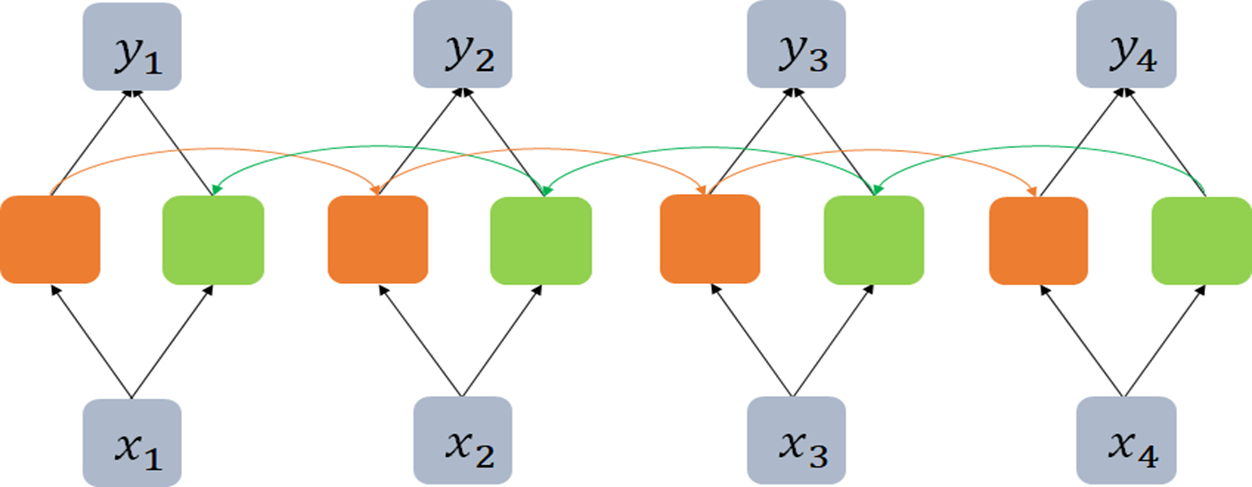

이번에는 무려 5개의 값을 반환합니다. return_state가 True인 경우에는 정방향 LSTM의 은닉 상태와 셀 상태, 역방향 LSTM의 은닉 상태와 셀 상태 4가지를 반환하기 때문입니다. 다만, 셀 상태는 각각 forward_c와 backward_c에 저장만 하고 출력하지 않았습니다. 첫번째 출력값의 크기가 (1, 6)인 것에 주목합시다. 이는 return_sequences가 False인 경우 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태가 연결된 채 반환되기 때문입니다. 그림으로 표현하면 아래와 같이 연결되어 다음층에서 사용됩니다.

In [16]:
bilstm(train_X)  # hidden_states, forward_h, forward_c, backward_h, backward_c

(<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
 array([[0.63031393, 0.63031393, 0.63031393, 0.7038734 , 0.7038734 ,
         0.7038734 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.63031393, 0.63031393, 0.63031393]], dtype=float32)>,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.5707088, 1.5707088, 1.5707088]], dtype=float32)>,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.7038734, 0.7038734, 0.7038734]], dtype=float32)>,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.6402447, 1.6402447, 1.6402447]], dtype=float32)>)

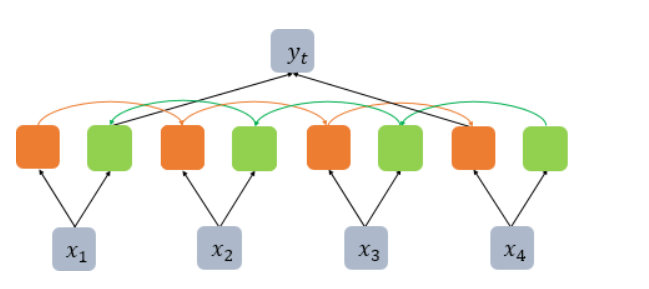

https://wikidocs.net/images/page/94748/bilstm3.PNG

마찬가지로 return_state가 True인 경우에 반환한 은닉 상태의 값인 forward_h와 backward_h는 각각 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태값입니다. 그리고 이 두 값을 연결한 값이 hidden_states에 출력되는 값입니다.

이를 이용한 실습은 11챕터의 BiLSTM으로 한국어 스팀 리뷰 분류하기(https://wikidocs.net/94748)에 준비되어져 있습니다.

정방향 LSTM의 마지막 시점의 은닉 상태값과 역방향 LSTM의 첫번째 은닉 상태값을 기억해둡시다.

* **정방향 LSTM의 마지막 시점** 의 은닉 상태값 : [0.6303139 0.6303139 0.6303139]
* **역방향 LSTM의 첫번째 시점** 의 은닉 상태값 : [0.70387346 0.70387346 0.70387346]  

현재 은닉 상태의 값을 고정시켜두었기 때문에 return_sequences를 True로 할 경우, 출력이 어떻게 바뀌는지 비교가 가능합니다.

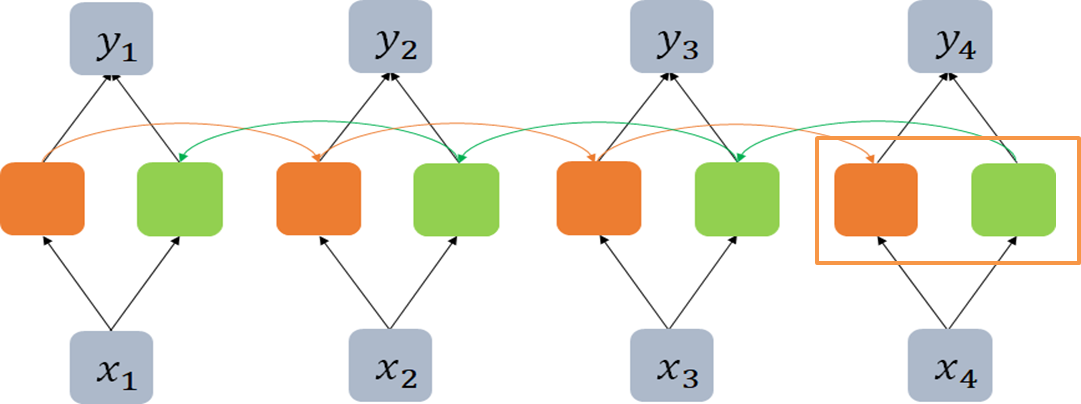

In [17]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [18]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.5511133  0.5511133  0.5511133  0.58863586 0.58863586 0.58863586]
  [0.59115756 0.59115756 0.59115756 0.3951699  0.3951699  0.3951699 ]
  [0.63031393 0.63031393 0.63031393 0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


In [19]:
print('forward cell state : {}, shape: {}'.format(forward_c, forward_c.shape))
print('backward cell state : {}, shape: {}'.format(backward_c, backward_c.shape))

forward cell state : [[1.5707088 1.5707088 1.5707088]], shape: (1, 3)
backward cell state : [[1.6402447 1.6402447 1.6402447]], shape: (1, 3)


hidden states의 출력값에서는 이제 모든 시점의 은닉 상태가 출력됩니다. 역방향 LSTM의 첫번째 시점의 은닉 상태는 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는 것이 아니라 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결됩니다.

그림으로 표현하면 다음과 같이 연결되어 다음층의 입력으로 사용됩니다.



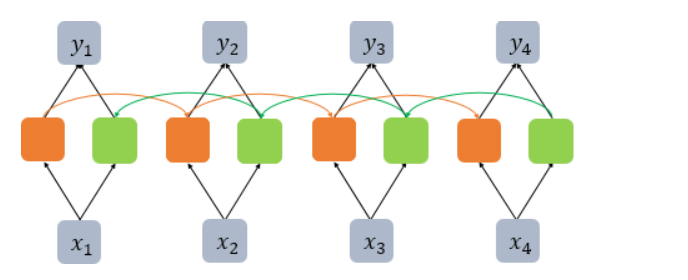

https://wikidocs.net/images/page/94748/bilstm1.PNG